In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [2]:
dta = sm.datasets.fair.load_pandas().data

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [6]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [7]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [8]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [9]:
dta.drop(['affairs'], axis = 1, inplace = True)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [10]:
dta.occupation.value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

In [11]:
dta.occupation_husb.value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

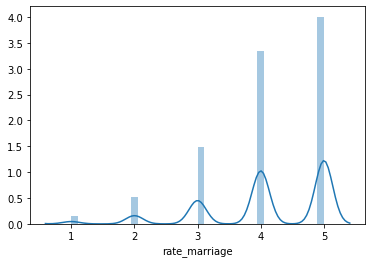

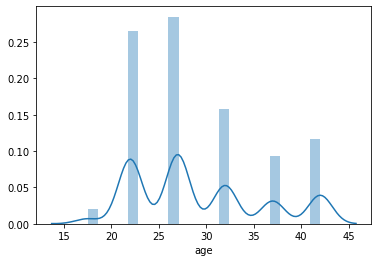

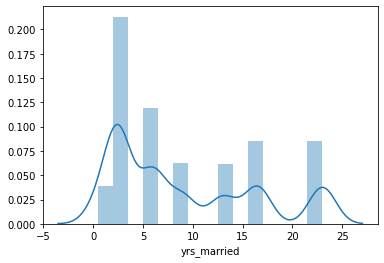

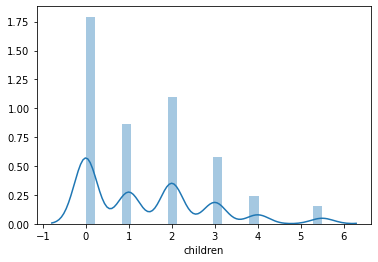

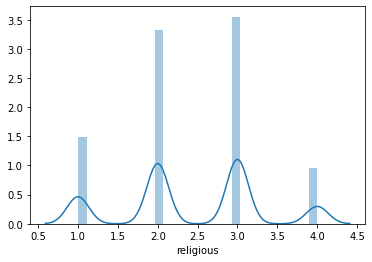

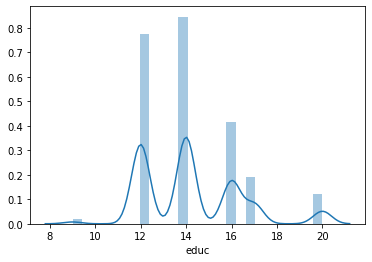

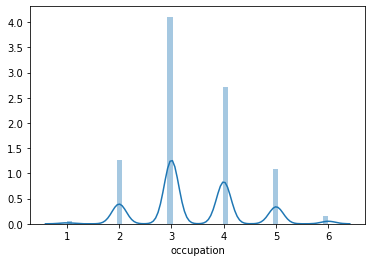

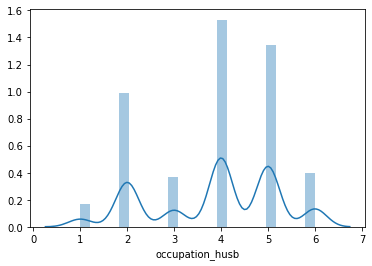

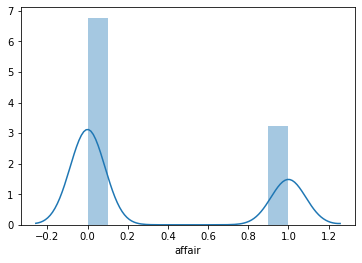

In [12]:
for col in dta.columns:
    if col != 'affairs':
        sns.distplot(dta[col])
        plt.xlabel(col)
        plt.show()
  

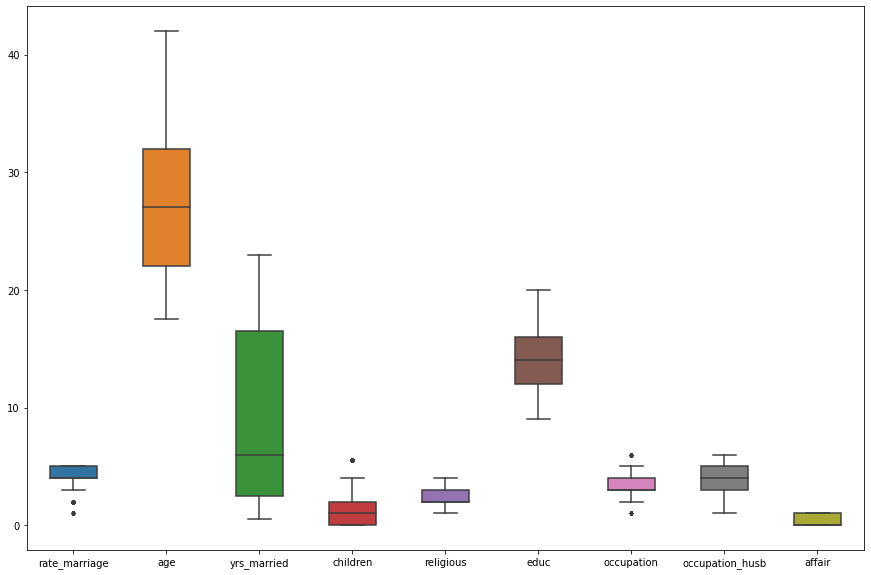

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)

In [15]:
#outliers in rate_marriage, children, occupation columns


In [14]:
dta['rate_marriage'].value_counts()

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

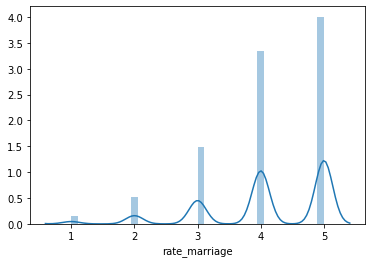

In [15]:
sns.distplot(dta['rate_marriage'])

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

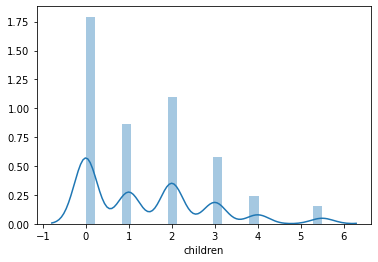

In [16]:
sns.distplot(dta['children'])
dta['children'].value_counts()

3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64

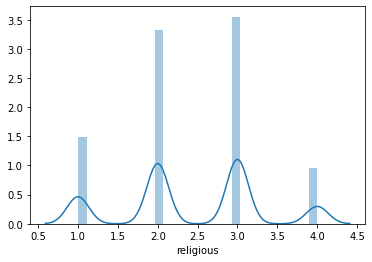

In [17]:
sns.distplot(dta['religious'])
dta['religious'].value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

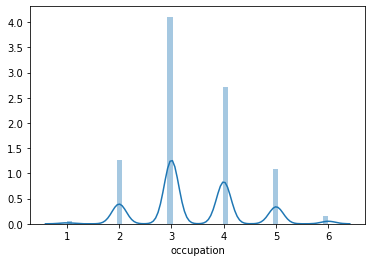

In [18]:
sns.distplot(dta['occupation'])
dta['occupation'].value_counts()

In [19]:
#Ordinal - religious, rate_marriage, education
#nominal - occupation, occupation_husb

In [20]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [21]:

scalar1 = StandardScaler()
dta_scaled = scalar1.fit_transform(dta)
dta_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
        -1.51129246e+00,  8.54069123e-01,  1.44942335e+00],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -4.50087100e-01,  1.11309009e-01,  1.44942335e+00],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01,  8.54069123e-01,  1.44942335e+00],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01, -2.11697133e+00, -6.89929549e-01],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -4.50087100e-01,  1.11309009e-01, -6.89929549e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -1.51129246e+00,  1.11309009e-01, -6.89929549e-01]])

In [22]:
vif1 = pd.DataFrame()
vif1["vif"] = [variance_inflation_factor(dta_scaled,i) for i in range(dta_scaled.shape[1])]
vif1["Features"] = dta.columns

#let's check the values
vif1

,vif,Features
0,1.141118,rate_marriage
1,5.484351,age
2,7.266595,yrs_married
3,2.529023,children
4,1.056106,religious
5,1.297512,educ
6,1.211159,occupation
7,1.082913,occupation_husb
8,1.191679,affair


In [23]:
#correlation between age and yrs_married

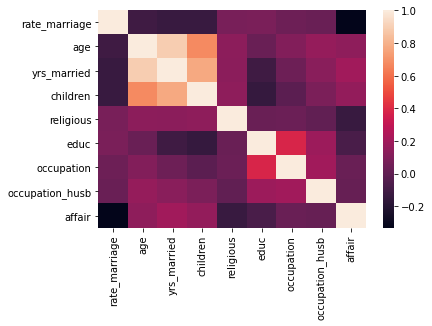

In [24]:
corr = dta.corr()
sns.heatmap(corr)

In [25]:
#removing the age column from dta
dta.drop(['age'], axis = 1, inplace = True)
dta.head()

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [26]:
y, X = dmatrices('affair ~ rate_marriage + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [27]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(6366, 16)
(6366, 1)


In [28]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [29]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,6.0,1.0,3.0,14.0


In [30]:
Y = np.ravel(y)

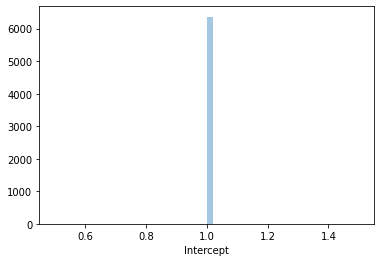

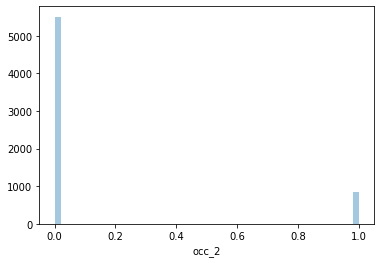

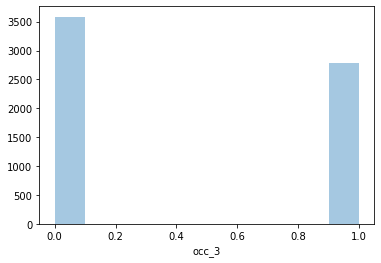

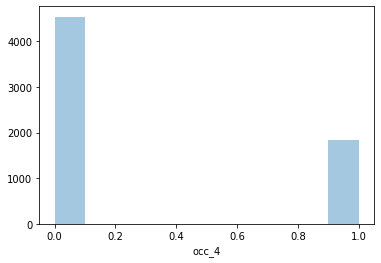

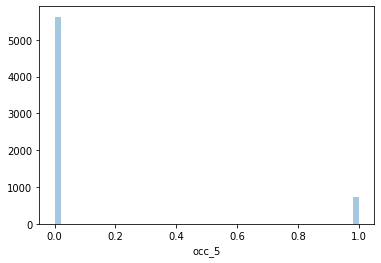

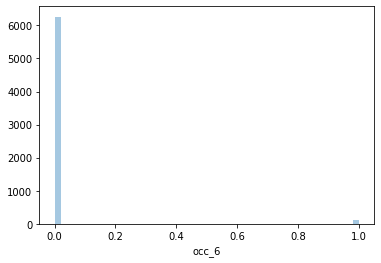

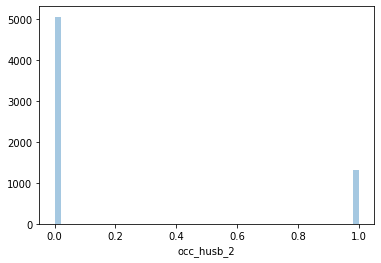

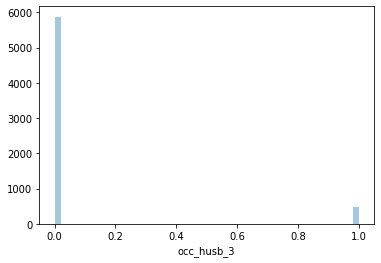

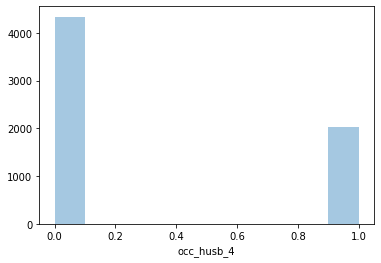

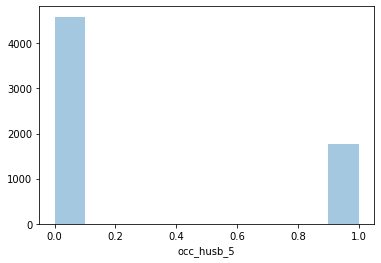

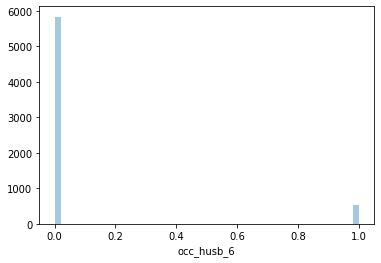

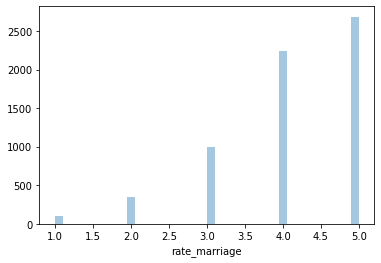

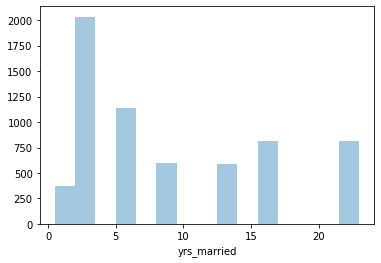

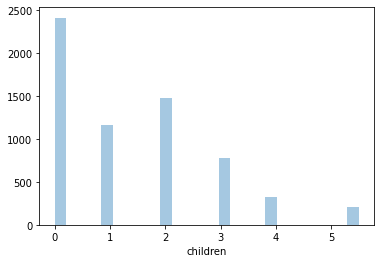

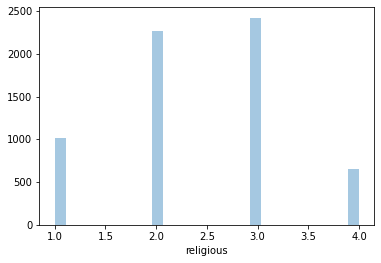

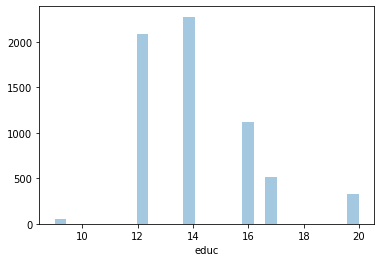

In [31]:
for col in X.columns:

    sns.distplot(X[col],kde = False)
    plt.xlabel(col)
    plt.show()

In [32]:
X.drop(['Intercept'], axis = 1, inplace = True)

In [33]:
X.columns

Index(['occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2', 'occ_husb_3',
       'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [34]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [35]:
X_scaled

array([[ 2.531984  , -0.88131913, -0.63614294, ...,  1.11844056,
         0.65334148,  1.28115287],
       [-0.3949472 ,  1.13466276, -0.63614294, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 2.531984  , -0.88131913, -0.63614294, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [36]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,19.331745,occ_2
1,39.312316,occ_3
2,32.903214,occ_4
3,17.040554,occ_5
4,3.694896,occ_6
5,5.556756,occ_husb_2
6,2.981891,occ_husb_3
7,6.920439,occ_husb_4
8,6.555388,occ_husb_5
9,3.173086,occ_husb_6


In [37]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y, test_size= 0.25, random_state = 355)

In [38]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = lg.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7160804020100503

In [41]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[971, 113],
       [339, 169]])

In [42]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [43]:
precision = true_positive/(true_positive+false_positive)
precision

0.8957564575645757

In [44]:
recall = true_positive/(true_positive+false_negative)
recall

0.7412213740458016

In [46]:
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.8111946532999165

In [47]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6142168114594532

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

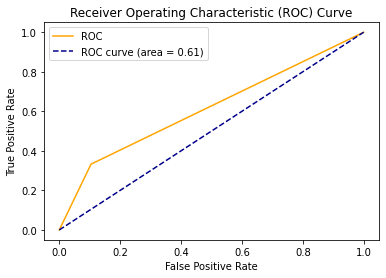

In [49]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

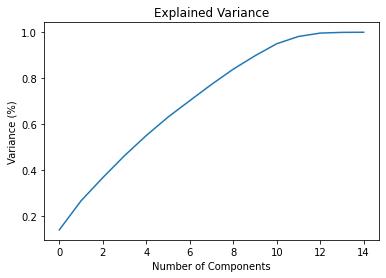

In [50]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [51]:
X_scaled.shape

(6366, 15)

In [67]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(X_scaled)

principal_x1 = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

In [68]:
principal_x1.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-0.079638,1.598468,0.556278,-1.292681,-0.769471,-0.016621,-0.131223,0.697067,-2.147129,1.163355
1,-1.298466,0.068868,-0.302869,1.974456,0.147820,0.564616,-0.549319,1.776774,0.227263,-0.414266
2,0.130247,-1.493220,-1.966156,-0.972691,-0.325842,-0.052929,-0.697965,1.209515,-0.641365,-0.388524
3,-0.029770,2.901777,-1.385517,-1.119244,-1.420726,1.243400,0.573148,-0.533943,0.825435,0.416659
4,-0.542243,-1.353459,-0.384633,1.591414,-0.140545,0.651535,-0.442640,0.304918,-0.192919,-1.255799


In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(principal_x1,Y,test_size = 0.30, random_state= 355)
lg1 = LogisticRegression()
lg1.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
Y_pred = lg1.predict(X_test)

In [55]:
accuracy1 = accuracy_score(Y_test, Y_pred)
accuracy1

0.7167539267015707

In [56]:
conf_mat1 = confusion_matrix(Y_test,Y_pred)
conf_mat1

array([[1162,  126],
       [ 415,  207]])

In [76]:
TP = conf_mat1[0][0]
FP = conf_mat1[0][1]
FN = conf_mat1[1][0]
TN = conf_mat1[1][1]

In [58]:
precision1 = TP/(TP+FP)
precision1

0.9021739130434783

In [59]:
recall1= TP/(TP+FN)
recall1

0.7368421052631579

In [60]:
f1_score1 = 2*precision1*recall1/(precision1+recall1)
f1_score1

0.8111692844677139

In [61]:
auc1 = roc_auc_score(Y_test, Y_pred)
auc1

0.6174856703481056

In [62]:
fpr1, tpr1, thresholds1 = roc_curve(Y_test, Y_pred)

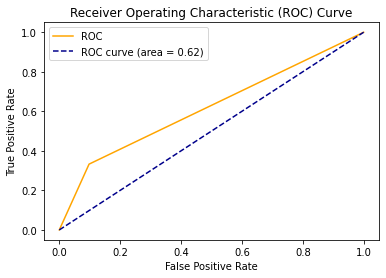

In [63]:
plt.plot(fpr1, tpr1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

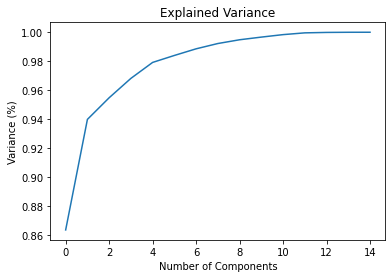

In [65]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [69]:
pca = PCA(n_components=8)
new_data1 = pca.fit_transform(X)

principal_x2 = pd.DataFrame(new_data1,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [70]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(principal_x2,Y,test_size = 0.30, random_state= 355)
lg1 = LogisticRegression()
lg1.fit(X_train1,Y_train1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
Y_pred1 = lg1.predict(X_test1)

In [73]:
accuracy2 = accuracy_score(Y_pred1, Y_test1)
accuracy2

0.7068062827225131

In [74]:
conf_mat2 = confusion_matrix(Y_test1,Y_pred1)
conf_mat2

array([[1155,  133],
       [ 427,  195]])

In [77]:
TP1 = conf_mat2[0][0]
FP1= conf_mat2[0][1]
FN1 = conf_mat2[1][0]
TN1 = conf_mat2[1][1]

In [78]:
precision2 = TP1/(TP1+FP1)
precision2

0.8967391304347826

In [79]:
recall2= TP1/(TP1+FN1)
recall2

0.7300884955752213

In [80]:
f1_score2 = 2*precision2*recall2/(precision2+recall2)
f1_score2

0.8048780487804879

In [81]:
auc2 = roc_auc_score(Y_test1, Y_pred1)
auc2

0.605121976792954